### 目標:從文章中濾出和食物，餐廳最有關的資料

In [1]:
def decode_to_dic(s):
    temp=s.split("\n")
    temp=[x.split(",") for x in temp]
    dic={}
    for i in temp:
        try:
            dic[i[0]]=float(i[1])
        except:
            print(i,"error")
        
    return dic
def decode_txt(a):
    alist=a.split("\n>->")
    re_=[]
    for i in range(len(alist)):
        temp_word=alist[i].split("(*)")
        if (len(temp_word)>2):
            re_.append(singleword(temp_word))       
    #alist=[x.split("(*)") for x in alist]    
    return re_
class singleword:
    def __init__(self,L):
        self.word=L[0]
        self.id=L[1]
        self.type=L[2]
        self.pword=L[5]
        self.linktype=L[3]
        self.tag=[]
    def show(self):
        print(self.word,self.type,self.index,"  ",self.pword,self.linktype,self.tag)
    def setindex(self,p):
        self.index=p
def change_to_word(wL):
    return [singleword(wL[x]) for x in range(1,len(wL)) ]
def decode_article(a):
    re_article=[]
    re=a.split("<=sep=>")
    re=[x.split("<=set=>") for x in re]
    for i in re:
        temp=[]
        for j in i:
            temp.append(decode_txt(j))
        re_article.append(temp)
    return re_article
def get_str(needlist,spot1):
    temp=spot1.wordtype==needlist[0]
    for j in range(1,len(needlist)):
        temp=temp+(spot1.wordtype==needlist[j])
    return " ".join(spot1.word[temp])
def get_str_tf(needlist,spot1):
    temp=spot1.wordtype==needlist[0]
    for j in range(1,len(needlist)):
        temp=temp+(spot1.wordtype==needlist[j])
    return temp
def filter_ratio(mat,from_a=0,to_b=0):
        if(from_a>=to_b):
            return None
        else:
            narray=np.array(mat)
            narrayindoc=np.sum(np.heaviside(narray, 0),0 )
            narrayratio=narrayindoc/narray.shape[0]
            ntfa=from_a<narrayratio
            ntfb=narrayratio<=to_b
            ntf1=ntfa*ntfb
            return ntf1

def give_rank(dic,word,c=0):
    re_mat=[]
    for i in word:
        try:
            re_mat.append(dic[i])
        except:
            re_mat.append(0)
    return re_mat
def create_dic(needword,word,mat):
    needword=list(needword)
    word=list(word)
    dic={}
    for i in needword:
        dic[i]=mat[word.index(i)]
    return dic   
def create_list(needword,word,mat):
    needword=list(needword)
    word=list(word)
    
    relist=[]
    for i in needword:
        relist.append([i,mat[word.index(i)]])    
    return relist 
import itertools
class spot_tfidf:
    def __init__(self,tf_mat,word,title):
        self.mat=self.avgm(tf_mat)
        self.word=word
        self.title=title
    def get_mat(self,title_):
        for i in range(len(self.title)):
            if(title_ == self.title[i]):
                temp=i
                break
        return self.mat[i]
    def spword_tf(self,needlist,batch=2):
        temp=[self.get_mat(x) for x in needlist]
        temp=list(itertools.combinations(temp,batch))
        temp=np.sum(np.array([np.multiply.reduce(np.array(x)) for x in temp]),0)
        return temp    
    def avgm(self,m):                 #對x向除以sum
        s=(np.sum(m,1))
        m1=m/(s.reshape(s.shape[0],1)+0.000000001)
        return m1  
    def most_similar(self,mat):
        temp=self.mat*mat
        return np.sum(temp,1)
    def filter_ratio(self,from_a=0,to_b=0):
        if(from_a>=to_b):
            return None
        else:
            narray=np.array(self.mat)
            narrayindoc=np.sum(np.heaviside(narray, 0),0 )
            narrayratio=narrayindoc/narray.shape[0]
            ntfa=from_a<narrayratio
            ntfb=narrayratio<=to_b
            ntf1=ntfa*ntfb
            return ntf1   
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
class spot:
    def __init__(self,s):
        temp=decode_article(s)
        self.spot=[]
        for i in temp:
            if(len(i)>2):
                self.spot.append(i)
        self.wordtype=[]
        self.word=[]
        self.sentence=[]
        self.article=[]
        self.tags={}
        for art,arti in zip(self.spot,range(len(self.spot))):
            for sent,senti in zip(art,range(len(art))):
                for word in sent:
                    self.article.append(arti)
                    self.sentence.append(senti)
                    self.word.append(word.word)
                    self.wordtype.append(word.type)
        self.article=np.array(self.article)
        self.sentence=np.array(self.sentence)
        self.word=np.array(self.word)
        self.wordtype=np.array(self.wordtype)
    def show_all(self):
        for i in self.word:
            print(i,end="")
class look_into_article:
    def __init__(self,spot,article_=1):
        temp=spot.article==article_
        self.word=spot.word[temp]
        self.sentence=spot.sentence[temp]
    def show_article(self):
        print("".join(inspect_article.word))
    def set_article_rank(self,rank):
        if(len(rank)==len(self.word)):
            self.rank=np.array(rank)
        else:
            print("長度不合")

## 載入需要資料

In [2]:
with open ('D:/data/final_project/食記dic.csv',"r",encoding="utf8") as file:
    sfood=file.read()
with open ('D:/data/final_project/交通dic.csv',"r",encoding="utf8") as file:
    stravel=file.read()
with open ('D:/data/final_project/住宿dic.csv',"r",encoding="utf8") as file:
    shotel=file.read()


In [3]:
three_dict=[]
three_dict.append(decode_to_dic(sfood))
three_dict.append(decode_to_dic(stravel))
three_dict.append(decode_to_dic(shotel))

[''] error
[''] error
[''] error


In [4]:
txtlist=[]
import os,sys
dirs = os.listdir( "D:/data/final_project/article" )
print(dirs)

['AEON MALL OKINAWA RYCOM.txt', 'AEON北谷店 .txt', 'Ashibinaa Outlet .txt', 'BIC Camera難波店 .txt', 'BIOS之丘 .txt', 'Busena海中公園 .txt', 'Caretta汐留 .txt', 'DiverCity .txt', 'HEP FIVE摩天輪 .txt', 'JR TOWER T38展望室 .txt', 'Mild Seven之丘 .txt', 'ORION 啤酒名護工廠 .txt', 'OTS臨空豐崎營業所.txt', '一澤帆布 .txt', '三井Outlet Park大阪鶴見 .txt', '三井outlet 倉敷 .txt', '三十三間堂.txt', '三千院.txt', '三宮中心街 .txt', '三年坂.txt', '三角市場.txt', '三鷹之森吉卜力美術館 .txt', '上賀茂神社.txt', '上野 .txt', '上野動物園.txt', '上野恩賜公園.txt', '上野東照宮.txt', '上高地.txt', '下北澤 .txt', '下鴨神社.txt', '不忍池.txt', '世界大溫泉 .txt', '世豊商店.txt', '中之島 .txt', '中城公園.txt', '中島公園.txt', '中洲.txt', '中洲屋台.txt', '中禪寺湖 .txt', '主計町茶屋街.txt', '九州鐵道紀念館 .txt', '二年坂.txt', '二月堂.txt', '二木果子 .txt', '二条市場.txt', '二條城 .txt', '二荒山神社.txt', '五稜郭.txt', '井之頭恩賜公園.txt', '亞斗夢之丘 .txt', '交通.txt', '京都塔 .txt', '京都大學.txt', '京都御所.txt', '京都御苑.txt', '京都拉麵小路 .txt', '京都水族館.txt', '京都鐵道博物館 .txt', '仁和寺.txt', '今歸仁城跡.txt', '仙台朝市.txt', '仙巖園 .txt', '代代木公園 .txt', '代官山.txt', '仲見世通.txt', '伊勢神宮.txt', '伊達時代村.txt', '伏見稻荷大社.txt', '住宿.txt', '倉敷美觀地區

## 載入資料

In [9]:
spotlist=[]
dirs=dirs[0:100]
dirs=["黑門市場.txt","三年坂.txt","淺草.txt"]
for i in dirs:
    with open("D:/data/final_project/article/"+i,"r",encoding="utf8") as file:
        spotlist.append(spot(file.read()))

In [10]:
get_str(["ns","a"],spotlist[0])

'大阪 = 高雄 大阪 日本 驚人 很大 勉強 台灣 甜 東京 差 京都 失望 高雄 大阪 方便 吃驚 大阪 一樣 : 一般 一般 好 士林 大阪 雷 水 關東 冷XDDD 黑 好吃 完全 貴 便宜 少 大阪 完全 不同 完全 木津 好 黑 太多 黑 多 誠實 黑門 不行 好喝 濃 多 日本 多 最大 好吃 最甜 香 日本 黑 黑 大 日本橋 不好玩 雷 可怕 關東 好吃 努力 大阪 多 可愛 小 好 錦都 完全 普通 超貴 詭異 難 雷 大阪 棒 好吃 大 完全 大阪 台灣 中國 一樣 關西 雷、 黑 黑 長 黑 黑 不錯 黑 大 熱鬧 好 吹田 直接 美好 黑 雷 完全 便宜 黑門貴 新鮮 果斷 雷、 多 便當 低落 黑 普....在地人 空 黑 完全 黑 完全 不行 正確 台灣 黑 濃裕 黑門 關東 簡單 差 多 銀閣寺 金閣寺 不行 便宜 好吃、09/08 不錯 中之島 關東 厲害 黑 大 豪爽 京都 熟食區 迷人 日本橋 不錯 黑門 嚴重 少 伏見 桃山 完全 乾淨 貴 舒服 行 中肯 關東 好吃 關東 貴 中肯 黑 臭 貴 普 臭 完全 貴 台灣 好 愉快 陰暗 日本 開心 好吃 日本 光米 台灣 一樣 台北 完全 觀光客 仔細 黑 貴 好啦 北端 阪 急 一樣 日本橋 難波 少 多 黑 完全 一樣 好 開心 真 一樣 可怕 多 黑 台灣 直接 失望 感興趣 日本 京都 大阪 京都市 不小 寬敞 擁擠 好 開心 便宜 東京 相同 關西 一樣 不同 大 大阪心齋橋 最多 便宜 便宜 高 齊 東奔西跑 便宜 純 三木 冷 熱 厚實 香軟 新鮮 好吃 好吃 不錯 軟 鹹香 恰好 鬆軟 好吃 小 好吃 幸福 多 糊糊 奇妙 ... 多 好 酥脆 疲憊 日本橋 微涼 擁擠 熱情 少 多 舒服 寬廣 台灣 鮮 大 不同 熱 細碎 鮮 爽爽 台灣 鹹 石橋 關東 深刻 軟香 飽 好吃 關東 很香 太多 好吃 難 好 好吃 日本 正 大 漂亮 甜香 好吃 日本 香 酸 甜 台灣 貴 甜 香 一般 紅 貴 多 紅 甜 香 便宜 好 便宜 一樣 不同 日本 台灣 好 便宜 好吃 京都 漂亮 : 82.html 石橋 關東 好吃 特別 黑 好吃 關東 愜意 衛生 麻煩 重 耐熱 關東 小 黑門 貴 臺灣 新鮮 台灣 食品安全 日本 關東 日本 重 健康 保麗龍 白 很漂亮 一

In [11]:
three_dict[0]["飯店"]

0.022865497979547494

# 過濾文章

In [12]:
inspect_article=look_into_article(spotlist[1],4)
article_rank=give_rank(three_dict[0],inspect_article.word)
article_rank_t=give_rank(three_dict[1],inspect_article.word)
article_rank_h=give_rank(three_dict[2],inspect_article.word)
inspect_article.set_article_rank(article_rank)
inspect_article.show_article()


、京都、三年<U+5742>＆午餐「<U+304D><U+3087><U+3046><U+5742>」時間Fri、Oct、12、23:31:49、2012＊＊圖文皆有之部落格版：http://tinyurl.com/kqvv3gy繼續京阪行買完山椒後我們就走往旁邊小徑去這裡就是有名的『三年<U+5742>』三年<U+5742>的原名叫『產寧<U+5742>（<U+3055><U+3093><U+306D><U+3044><U+3056><U+304B>）』清水寺的泰產寺原本在仁王門附近（後於20世紀初遷至目前現址）信眾於泰產寺祈求順產及子女安康於是將前往泰產寺的這條<U+5742>道稱為「產寧<U+5742>（<U+3055><U+3093><U+306D><U+3044><U+3056><U+304B>）」後因其諧音的關係而有「再念<U+5742>（<U+3055><U+3044><U+306D><U+3093><U+3056><U+304B>）」及「三年<U+5742>（<U+3055><U+3093><U+306D><U+3093><U+3056><U+304B>）」的稱號之後這名稱開始有了奇怪的傳說據說在三年<U+5742>這邊跌倒會「三年內必死」、「減壽三年」或是「女生獨身終老」等無稽之談但據說當時整個江戶時代因此說而鬧得熱烈當時還出現不少「瓢簞屋」所謂的「瓢簞屋」就是賣葫蘆的店家當時的傳言若要化解在三年<U+5742>跌倒之災就買個葫蘆、即可解厄（以上資訊參考：『正文社、、京阪神旅遊全攻略』）我覺得這個傳說會不會是當時賣葫蘆的商人想出來的搞得人心惶惶、而且這邊通道真的有點陡、一不小心確實會有摔倒的危險以當時道路的狀況來說應該更容易有這樣的情況所以傳出這樣的傳言、然後說買葫蘆就可以消災吼～～這樣生意一定大好的啊！！嘖嘖...應該是商人的陰謀啊～～～、<U+30FE>(*ΦωΦ)<U+30C4>看看這階梯的模樣很陡、而且也不寬敞人潮一多時就怕一個碰撞不穩如果沒人即時攙扶、可是很容易摔倒捏...窄窄的<U+5742>道兩旁有不少商家及餐廳看到這個「世界一辛」的招牌我不禁「噗ㄘ」一笑說實話在日本吃到的激辛料理真的不多所以要稱「世界一辛」我多少都有點存疑但最後一天我在機場買的「黃金一味」就真的有辣我們都很愛黃金一味風味很不錯雖然辣度對我來說是還好不過真的可以品嚐出

#### 獲得文章每段句子的分數(食物方面)越高分表和主題越有關

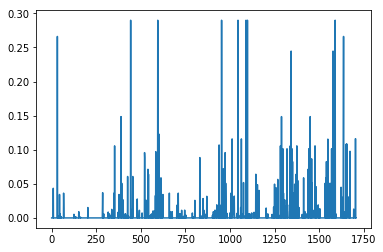

In [13]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(article_rank))),article_rank)
plt.show()

### 發現分布很不均 ，那就把結果模糊化吧

In [14]:
rank_f=[0]
rank_t=[0]
rank_h=[0]


for i in range(1,inspect_article.sentence[-1]):
    #print(" ".join(inspect_article.word[inspect_article.sentence==i]))
    temp=np.array(article_rank)[inspect_article.sentence==i]
    rank_f.append(np.sum(temp)/(len(temp)+1))
    temp=np.array(article_rank_h)[inspect_article.sentence==i]
    rank_h.append(np.sum(temp)/(len(temp)+1))
    temp=np.array(article_rank_t)[inspect_article.sentence==i]
    rank_t.append(np.sum(temp)/(len(temp)+1))
    #print(rank[i])
print(sum(rank_f)/len(rank_f))
print(sum(rank_t)/len(rank_t))
print(sum(rank_h)/len(rank_h))
def get_blurry(mat):
    remat=mat
    for i in range(1,9):
        remat=remat+(np.roll(mat,i)+np.roll(mat,-i))*0.8**i
    return remat
def compare_two(m1,m2):
    temp=(m1-m2)
    return temp
    
rank_sp = get_blurry(compare_two(np.array(rank_f),0.5*(np.array(rank_t)+np.array(rank_h))))
avg_sp=sum(rank_f)/len(rank_f)*3-0.5*sum(rank_t)/len(rank_t)-0.5*sum(rank_h)/len(rank_h)

len_use=0
left=[]
for i in range(1,inspect_article.sentence[-1]):
    
    if(rank_sp[i]>avg_sp):
        print(" ".join(inspect_article.word[inspect_article.sentence==i]))
        
        len_use+=1
    else:
        left.append(" ".join(inspect_article.word[inspect_article.sentence==i]))
        print("=============",end="^")
    

0.006029201031380046
0.003083849255900305
0.0037751991284902813
=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^所謂 的 「 瓢簞 屋 」 就是 賣 葫蘆 的 店家
當時 的 傳言
若要 化解 在 三年 <U + 5742 > 跌倒 之 災
就 買 個
葫蘆 、 即可 解厄
（ 以上 資訊 參考 ： 『 正文 社 、 、 京阪神旅遊全攻略 』 ）
我 覺得
這個 傳說 會 不會 是 當時 賣 葫蘆 的 商人 想 出來 的
=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^看到 這個 「 世界 一 辛 」 的 招牌
我 不禁 「 噗ㄘ 」 一笑
說實話
在 日本 吃到 的 激辛 料理 真的 不 多
所以 要 稱 「 世界 一 辛 」
我 多少 都 有點 存疑
但 最後 一天 我 在 機場 買 的 「 黃金 一味 」 就 真的 有 辣
我們 都 很 愛 黃金 一味
風味 很 不錯
雖然 辣度 對 我 來說 是 還 好
不過 真的 可以 品嚐 出有 辣味 呢 ！！ 很 推薦 給 嗜 辣 的 人 ！！
（ 再次 說明
我 個人 嗜 辣 程度 已 超過 常人
=============^=============^=============^===

### 模糊化的結果


 53.14009661835749 %


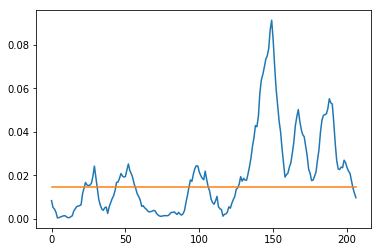

、 京都 、 三 年 <U + 5742 >＆ 午餐 「 < U + 304 D > < U + 3087 > < U + 3046 > <U + 5742 > 」 時間 Fri 、 Oct 、 12 、 23:31:49 、 2012
＊ ＊ 圖文 皆有 之 部落 格 版 ：
http://tinyurl.com/kqvv3 gy
繼續 京 阪行
買 完 山椒 後
我們 就 走往 旁邊 小徑 去
這裡
就是 有名 的 『 三年 <U + 5742 > 』
三年 <U + 5742 > 的 原名 叫 『 產寧 <U + 5742 > （ < U + 3055 > < U + 3093 > < U + 306D>< U + 3044 > < U + 3056 > < U + 304 B> ） 』
清水寺 的 泰產寺 原本 在 仁 王 門 附近 （ 後 於 20 世紀 初 遷至 目前 現址 ）
信眾 於 泰產寺 祈
求 順產 及 子女 安康
於是 將 前往 泰產寺 的 這 條 <U + 5742 >道 稱為 「 產寧 <U + 5742 > （ < U + 3055 > < U + 3093 > < U + 306D>< U + 3044 > < U + 3056 > < U + 304 B> ） 」
後 因其 諧音 的 關係
而有 「 再 念 <U + 5742 > （ < U + 3055 > < U + 3044 > < U + 306D>< U + 3093 > < U + 3056 > < U + 304 B> ） 」 及 「 三年 <U + 5742 > （ < U + 3055 > < U + 3093 > < U + 306D>< U + 3093 > < U + 3056 > < U + 304 B> ） 」 的
稱號
之後 這 名稱 開始 有 了 奇怪 的 傳說
據說 在 三 年 <U + 5742 > 這邊 跌倒
會 「 三 年 內 必 死 」 、 「 減
壽三年 」 或是 「 女生 獨身 終老 」 等 無稽之談
但 據說 當時 整個 江戶 時代 因此 說 而 鬧 得 熱烈
當時 還 出現 不少 「 瓢簞 屋 」
搞得 人心惶惶 、 而且 這邊 通道 真的 有點 陡 、 一不小心 確實 會 有 摔倒 的 危險
以 當時 道路 的 狀況 來說
應該 

In [15]:
print("\n",len_use/len(rank_sp)*100,"%")
plt.plot(list(range(len(rank_sp))),rank_sp)
plt.plot(list(range(len(rank_sp))),avg_sp*np.ones(len(rank_sp)))
plt.plot()
plt.show()
print("=======================過濾掉的==============================")
for i in left:
    print(i)


### 以下是找尋找相似景點的嘗試

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
tfidf_one_article_input=[]
three_dict=[]
for i in range(3):
    need_article=spotlist[i]
    for j in range(need_article.article[-1]):
        tfidf_one_article_input.append(" ".join(need_article.word[(need_article.article==j)*(get_str_tf(["a","n","nh","nf","nsf","v"],need_article))]))
    vectorizer1 =CountVectorizer()
    tfidf_article = vectorizer1.fit_transform(tfidf_one_article_input)
    articleword=np.array(vectorizer1.get_feature_names())
    tf_mat_article=tfidf_article.toarray()
    three_dict.append(create_dic(articleword[filter_ratio(tf_mat_article,0.01,1)],testword,tf_mat[i]))

In [156]:
three_dict[0]

{'12': 0.0024398538961786158,
 '2018': 0.0024398538961786158,
 '600yen': 0.004463069511187208,
 'bbs': 0.09113306654349582,
 'blog': 0.0015243665319698329,
 'cc': 0.09113306654349582,
 'com': 0.07545614333250672,
 'cp值': 0.0048797077923572315,
 'facebook': 0.01518884442391597,
 'feel': 0.0024398538961786158,
 'flickr': 0.037078061578488405,
 'food': 0.041655315437747274,
 'fubabytw': 0.0048797077923572315,
 'fw': 0.018298904221339618,
 'html': 0.015243665319698329,
 'http': 0.00441292801715709,
 'https': 0.0022865497979547493,
 'ig': 0.0024398538961786158,
 'instagram': 0.0020598923099160223,
 'japan': 0.07264229941872856,
 'jp': 0.0017651712068628362,
 'jpg': 0.06859649393864248,
 'jr': 0.0030898384648740335,
 'jr山手線': 0.0024398538961786158,
 'k5': 0.011329407704538124,
 'maruko': 0.003659780844267924,
 'menu': 0.0020598923099160223,
 'no': 0.003659780844267924,
 'ok': 0.0030487330639396657,
 'photos': 0.037078061578488405,
 'ptt': 0.09113306654349582,
 'qq': 0.009905768102553893,
 'q

In [80]:
temp_dic["藥妝"]

0.03544778529881435

### 類似景點 tfidf 類似程度

## 整體tfidf

In [100]:
tfidf_input=[]
for i ,j in zip(spotlist,range(len(spotlist))):
    try:
        tfidf_input.append(get_str(["a","n","nh","nf","nsf","v"],i))
    except:
        tfidf_input.append("ng ng ng")
        print(dirs[j])
vectorizer = TfidfVectorizer()     
tfidf = vectorizer.fit_transform(tfidf_input)
testword=np.array(vectorizer.get_feature_names())
tf_mat=tfidf.toarray()

In [101]:
print((np.argsort(tf_mat[1])))
print(type(testword))


[18703  8172  8173 ...  9417  4340  6914]
<class 'numpy.ndarray'>


In [21]:
def show_top_word(tf,top_n,testword_):
    _testword_=np.array(testword_)
    print(_testword_[np.flip(np.argsort(tf),0)][0:top_n])
show_top_word(tf_mat[1],200,testword)

NameError: name 'tf_mat' is not defined

__[blog_排組](https://www.cnblogs.com/alexkh/archive/2013/03/20/2971533.html)__

In [29]:
test=spot_tfidf(tf_mat,testword,dirs)
need_=test.filter_ratio(0.01,1)
test.mat=test.mat[:,need_]
test.word=test.word[need_]

In [35]:
test.mat.shape

(505, 16877)

### 顯示相似景點

In [31]:
show_top_word(test.most_similar(test.spword_tf(["世豊商店.txt","合羽橋道具街 .txt","巢鴨地藏通商店街 .txt"])),30,dirs)

['千日前道具屋筋商店街.txt' '京都御苑.txt' '大須觀音.txt' '合羽橋道具街 .txt' '水鏡天滿宮 .txt'
 '心齋橋筋商店街.txt' '新京極商店街.txt' '東京站一番街 .txt' '天神橋筋商店街.txt' '戎橋.txt'
 '神戶港塔 .txt' '巢鴨地藏通商店街 .txt' '橫濱元町商店街.txt' '大須商店街.txt' '吉祥寺.txt'
 '大阪生活今昔館 .txt' '原宿.txt' '三宮中心街 .txt' '阿美橫丁 .txt' '輕井澤王子outlet .txt'
 '臨空城Outlet .txt' '增上寺 .txt' '狸小路.txt' '免稅店DFS.txt' '道頓堀水上觀光船.txt'
 '仲見世通.txt' '常寂光寺.txt' '四條河原町.txt' '御殿場 Premium Outlet .txt' '阿蘇神社.txt']


In [32]:
show_top_word(test.most_similar(test.spword_tf(["根津神社.txt","北海道神宮.txt","上賀茂神社.txt","八坂神社.txt","出雲大社.txt"],batch=4)),30,dirs)

['川越冰川神社 .txt' '靖國神社 .txt' '上賀茂神社.txt' '下鴨神社.txt' '八坂神社.txt' '根津神社.txt'
 '嚴島神社 .txt' '平野神社.txt' '神樂坂.txt' '宮島.txt' '淺草神社 .txt' '櫛田神社.txt'
 '晴明神社.txt' '冰室神社 .txt' '千本鳥居.txt' '地主神社.txt' '伏見稻荷大社.txt' '千鳥之淵 .txt'
 '波上宮.txt' '水前寺成趣園.txt' '出雲大社.txt' '高千穗峽 .txt' '鬼之洗濯板 .txt' '江之島 .txt'
 '貴船神社.txt' '清水寺.txt' '野宮神社.txt' '祇園.txt' '圓山公園 .txt' '難波八阪神社.txt']


In [33]:
show_top_word(test.most_similar(test.spword_tf(["層雲峽 .txt","十和田湖.txt","嵐山.txt","摩周湖.txt"],batch=2)),30,dirs)

['華嚴瀑布 .txt' '層雲峽 .txt' '中禪寺湖 .txt' '十和田湖.txt' '白絲瀑布 .txt' '奧入瀨溪 .txt'
 '京都御苑.txt' '草津溫泉 .txt' '水鏡天滿宮 .txt' '常寂光寺.txt' '白鬚瀑布 .txt' '銀山溫泉 .txt'
 '八甲田山.txt' '知床五湖.txt' '高千穗峽 .txt' '永觀堂.txt' '霧島神宮.txt' '道後溫泉 .txt'
 '御殿場 Premium Outlet .txt' '定山溪 .txt' '別府地獄.txt' '河口湖.txt' '金閣寺.txt'
 '摩周湖.txt' '高尾山.txt' '嵐山.txt' '二荒山神社.txt' '青池 .txt' '雪之大谷 .txt' '上高地.txt']
